# **6610210301 ภานุพงศ์ สนไชย**

# **Assignment 05:** Match Keypoints

You are assigned to modify the function `match_two_keypoints` to create a match between two keypoints from different images by randomly selecting a keypoint from `image1` and finding its corresponding keypoint in `image2`.

You are supposed to brute-force search for keypoints in `image2` that is best match to the keypoint selected in `image1`. The steps are:

1. Calculate the ***Euclidean distance*** between the descriptor of keypoint in `image`1 and the descriptor of every keypoints in `image2`
2. ***Sort the distance values***, then pick the one with the lowest distance as the corresponding keypoint
3. Test if corresponding keypoint is a good match or bad match using the ***second nearest neighbor*** technique
4. Print out the location, descriptor, and the distance of best match
5. Visualize the best match between keypoint in `image1` and the keypoint you found in `image2`


Keypoint 171: (324.341064453125, 189.93653869628906)
Descriptor 171: [ 39.  47.  44.  31.  11.   8.  12.  12.  23.  30.  21.  16.  16.  17.
  30.  16.  17.  15.  16.  17.  35.  41.  37.  32.  51.  22.  11.  19.
  26.   5.  16.  60.  73.  28.  13.  14.  22.  45. 100. 108.  40.  16.
  38. 108. 101.  42.  21.  35. 108.  80.  50.  43.  11.  12.  19.  41.
  26.  23.  26.  34.  16.  22.  19.  12.  34.  47.  17.   7.  11.  14.
  35.  18.   4.  14.  26.  22.  76. 108.  87.  19.  80.  17.   4.  15.
  30.  41. 108. 108.  25.  20.  33. 107.  92.  54.  22.  19.  51.  20.
  37.  72.  38.  14.   7.  27.  49. 108. 108.  49.  14.  14.  17.  13.
  35.  46.  22.  18.   9.  13.  16.  11.   3.  22.  26.   9.  27.  73.
  63.  11.]

Keypoint 117: (303.1543884277344, 193.4645538330078)
Descriptor 117: [ 54.  32.  36.  59.  24.  10.   8.  20.  44.  23.  10.  11.   6.  27.
  52.  32.   3.  26.  26.   8.   7.  21.  13.   6.   4.   5.  14.  16.
   7.   7.  16.  14.  86.  19.  12.  20.  30.  52.  99. 103.  70.  1

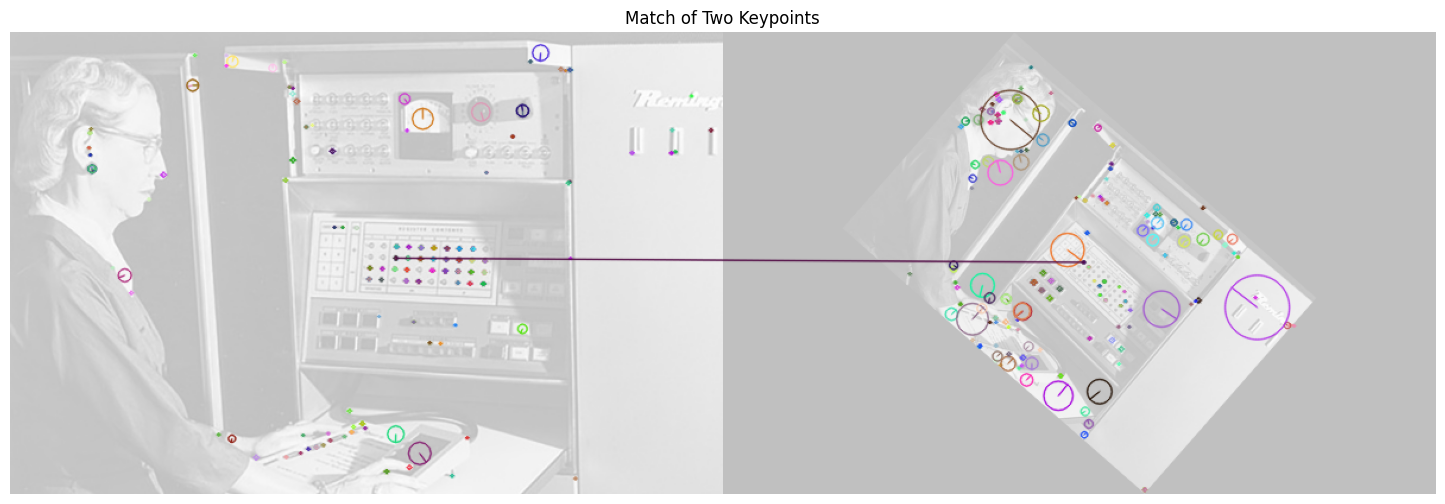

In [16]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

def match_two_keypoints(image1, image2):

    # Initialize SIFT detector
    sift = cv2.SIFT_create(nfeatures=200)

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    # Randomly select a keypoint from image1
    indx1 = random.randint(0, len(keypoints1)-1)
    keypoint1 = keypoints1[indx1]
    descriptor1 = descriptors1[indx1]

    # TODO: Find the best match in image2
    distances = np.linalg.norm(descriptors2 - descriptor1, axis=1)

    sorted_indices = np.argsort(distances)

    best_match_idx = sorted_indices[0]
    second_best_match_idx = sorted_indices[1]

    indx2 = best_match_idx
    keypoint2 = keypoints2[indx2]
    descriptor2 = descriptors2[indx2]
    distance = distances[indx2]

    # TODO: Test whether it is a good match or not
    if len(distances) > 1:
        ratio = distances[best_match_idx] / distances[second_best_match_idx]
        if ratio < 0.7:
            is_good_match = True
        else:
            is_good_match = False
    else:
        is_good_match = True

    # Print keypoint information and distance
    print(f"Keypoint {indx1}: {keypoint1.pt}")
    print(f"Descriptor {indx1}: {descriptor1}")
    print(f"\nKeypoint {indx2}: {keypoint2.pt}")
    print(f"Descriptor {indx2}: {descriptor2}")
    print(f"\nEuclidean Distance between descriptors: {distance}")
    if is_good_match:
        print("It is a good match.")
    else:
        print("It is a bad match.")
    print("\n")

    # Create DMatch object
    match = cv2.DMatch()

    # Set the indices for the match
    match.queryIdx = indx1  # Index of keypoint1 in keypoints1
    match.trainIdx = indx2  # Index of keypoint2 in keypoints2
    match.distance = distance  # Calculated distance

    # Draw matches
    matches = [match]  # Create a list of matches
    pale_image1 = np.uint8(image1 / 4.0 + 192.0)
    pale_image2 = np.uint8(image2 / 4.0 + 192.0)
    image_matches = cv2.drawMatches(
        pale_image1, keypoints1,
        pale_image2, keypoints2,
        matches, None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Plot the results
    # Plot the results
    plt.figure(figsize=(20, 6))
    plt.imshow(cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB))
    plt.title('Match of Two Keypoints')
    plt.axis('off')
    plt.show()

# Test match_two_keypoints
image1 = cv2.cvtColor(cv2.imread('grace_hopper.png'), cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(cv2.imread('grace_hopper_rotated_scaled.png'), cv2.COLOR_BGR2GRAY)
match_two_keypoints(image1, image2)